# Load Synthetic Grid Data

This notebook loads and examines the synthetic grid data pickle file generated by the data generation script.

In [2]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import sys

In [3]:
# Load the pickle file
pickle_path = "synthetic_data/grid_n1000000_beta1.0_noise0.1_seed42.pkl"

with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

print("Loaded data keys:", data.keys())

Loaded data keys: dict_keys(['A_sparse', 'G', 'y_true', 'X', 'Y'])


In [4]:
# Examine the data structure
print("Data structure:")
for key, value in data.items():
    if hasattr(value, 'shape'):
        print(f"- {key}: shape {value.shape}, dtype {value.dtype}")
    elif hasattr(value, 'number_of_nodes'):
        print(f"- {key}: NetworkX graph with {value.number_of_nodes()} nodes, {value.number_of_edges()} edges")
    elif value is None:
        print(f"- {key}: None")
    else:
        print(f"- {key}: {type(value)}")

Data structure:
- A_sparse: shape (1000000, 1000000), dtype float64
- G: None
- y_true: shape (1000000,), dtype float64
- X: shape (1000000, 1), dtype float64
- Y: shape (1000000, 1), dtype float64


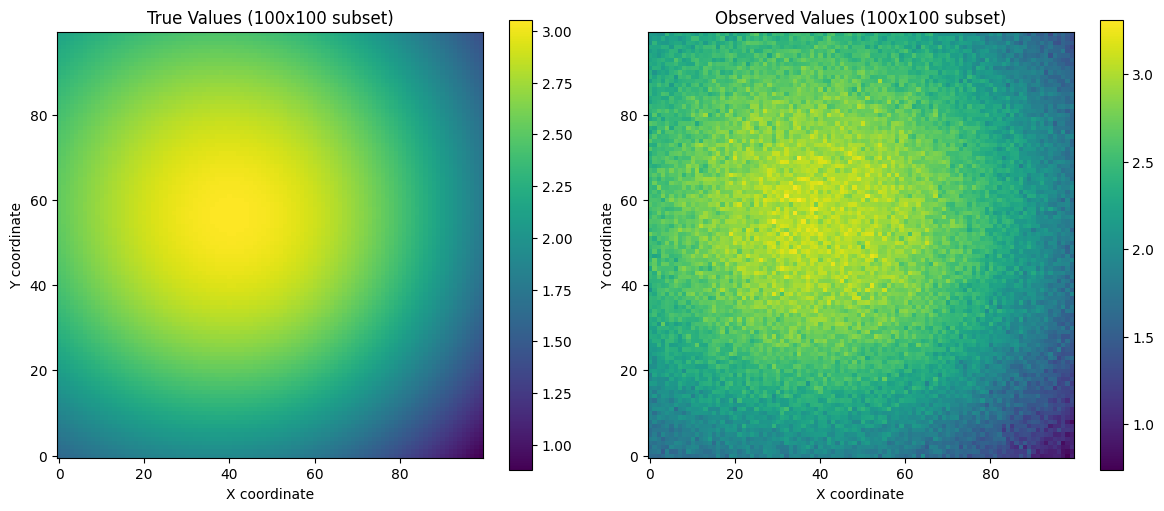

In [8]:
# Visualize a small subset of the grid (to avoid memory issues with 1M nodes)
grid_size = int(np.sqrt(len(data['y_true'])))
subset_size = min(100, grid_size)  # Show max 100x100 subset

# Extract subset from center
start_idx = (grid_size - subset_size) // 2
end_idx = start_idx + subset_size

# Reshape to 2D grid
y_true_2d = data['y_true'].reshape(grid_size, grid_size)
y_obs_2d = data['Y'].reshape(grid_size, grid_size)

# Extract subset
y_true_subset = y_true_2d[start_idx:end_idx, start_idx:end_idx]
y_obs_subset = y_obs_2d[start_idx:end_idx, start_idx:end_idx]

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(y_true_subset, cmap='viridis', origin='lower')
ax1.set_title(f'True Values ({subset_size}x{subset_size} subset)')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(y_obs_subset, cmap='viridis', origin='lower')
ax2.set_title(f'Observed Values ({subset_size}x{subset_size} subset)')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

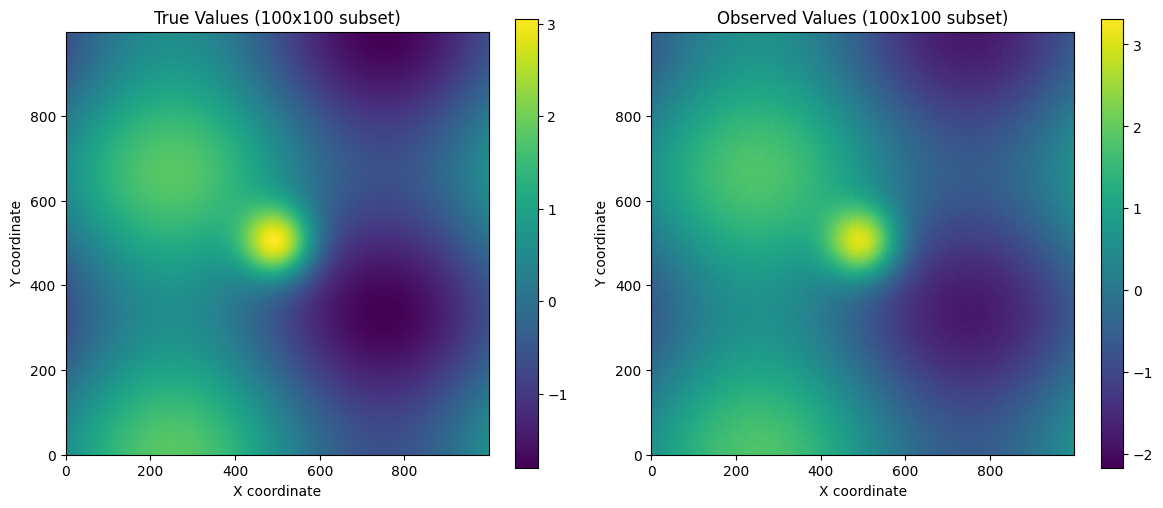

In [9]:
# Visualize a small subset of the grid (to avoid memory issues with 1M nodes)
grid_size = int(np.sqrt(len(data['y_true'])))


# Reshape to 2D grid
y_true_2d = data['y_true'].reshape(grid_size, grid_size)
y_obs_2d = data['Y'].reshape(grid_size, grid_size)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

im1 = ax1.imshow(y_true_2d, cmap='viridis', origin='lower')
ax1.set_title(f'True Values ({subset_size}x{subset_size} subset)')
ax1.set_xlabel('X coordinate')
ax1.set_ylabel('Y coordinate')
plt.colorbar(im1, ax=ax1)

im2 = ax2.imshow(y_obs_2d, cmap='viridis', origin='lower')
ax2.set_title(f'Observed Values ({subset_size}x{subset_size} subset)')
ax2.set_xlabel('X coordinate')
ax2.set_ylabel('Y coordinate')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()